In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hardness_data - Sheet1 (1).csv')

In [3]:
df.head(5)

,temp,time(hrs),hardness
0,175,0.69767,72.76191
1,175,2.16380,76.57143
2,175,3.58948,89.14286
3,175,4.98483,107.04761
4,175,6.43074,105.14285


In [4]:
df.shape

(42, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       42 non-null     int64  
 1   time(hrs)  42 non-null     float64
 2   hardness   42 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

temp         0
time(hrs)    0
hardness     0
dtype: int64

In [8]:
df.dtypes

temp           int64
time(hrs)    float64
hardness     float64
dtype: object

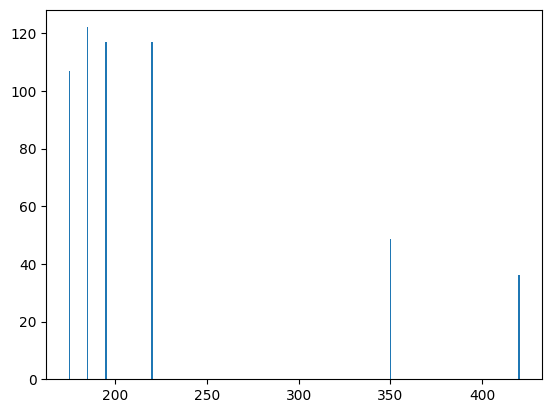

In [9]:
bars = plt.bar(df['temp'],df['hardness'])

plt.show()

In [10]:
cols_to_scale = ['temp','time(hrs)','hardness']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [12]:
df.head(5)

,temp,time(hrs),hardness
0,0.0,0.003505,0.550478
1,0.0,0.172808,0.585196
2,0.0,0.337440,0.699766
3,0.0,0.498569,0.862942
4,0.0,0.665537,0.845583


In [13]:
df.sample(5)

,temp,time(hrs),hardness
33,0.714286,0.828366,0.142009
29,0.714286,0.173425,0.315943
3,0.000000,0.498569,0.862942
18,0.081633,0.666339,0.751759
32,0.714286,0.667503,0.239776


In [14]:
df.corr()['hardness']

temp        -0.900660
time(hrs)   -0.055583
hardness     1.000000
Name: hardness, dtype: float64

In [15]:
 x = df.drop('hardness',axis=1)
 y = df['hardness']

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(x_test)

In [21]:
r2_score(y_test,y_pred)

0.9345056595821013

In [22]:
lr.score(x_train, y_train)

0.7681325568288999

In [23]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error

In [65]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
    ''' Take the different set of parameter and prints evaluation metrics '''
    MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=(np.sqrt(MSE))
    R2=(r2_score(y_true=yt,y_pred=yp))
    Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
    if disp=="on":
        print("MSE :",MSE,"RMSE :", RMSE)
        print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)
    
    #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((yp)[:100]) 
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted thermal expansion')
    
    return (MSE,RMSE,R2,Adjusted_R2) 

MSE : 0.0178 RMSE : 0.13341664064126332
R2 : 0.7681325568288999 Adjusted R2 : 0.7526747272841599


(0.0178, 0.13341664064126332, 0.7681325568288999, 0.7526747272841599)

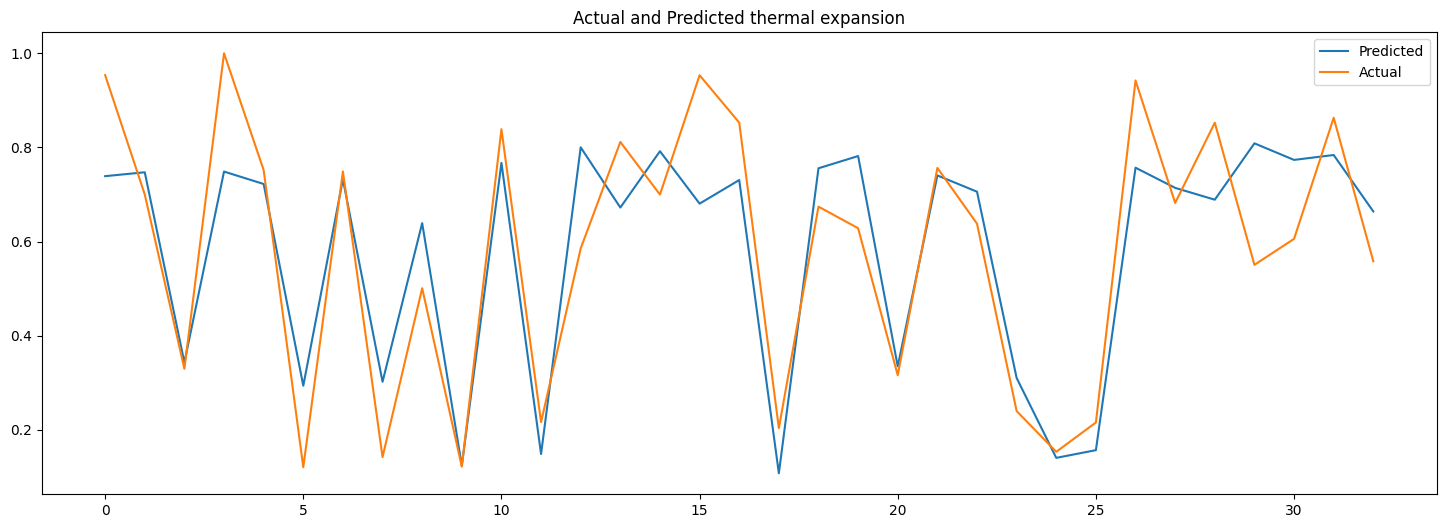

In [66]:
EvaluationMetric(x_train,y_train,y_pred_train)

MSE : 0.0064 RMSE : 0.08
R2 : 0.9345056595821013 Adjusted R2 : 0.912674212776135


(0.0064, 0.08, 0.9345056595821013, 0.912674212776135)

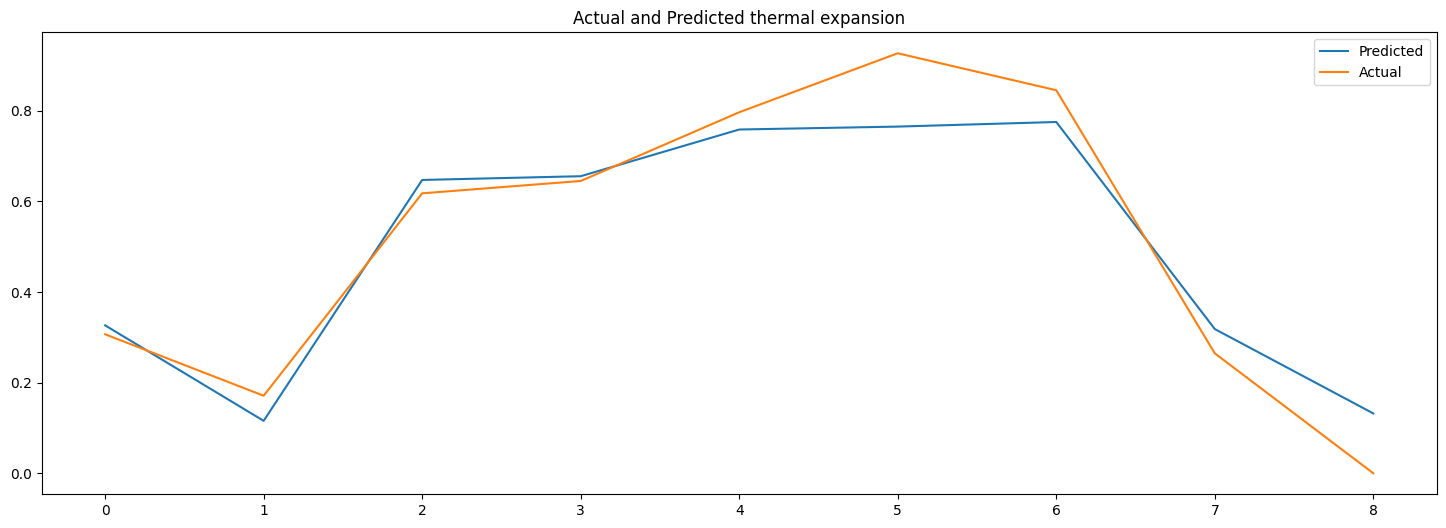

In [67]:
EvaluationMetric(x_test,y_test,y_pred_test)

In [68]:
x_test

,temp,time(hrs)
30,0.714286,0.338884
40,1.000000,0.829810
26,0.183673,0.831448
25,0.183673,0.666482
6,0.000000,0.997136
9,0.040816,0.337413
4,0.000000,0.665537
31,0.714286,0.500896
38,1.000000,0.504453


In [29]:
b = lr.predict([[0.714286,0.338884]])

C:\Users\prakhar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
b[0]

0.32651313126444526

In [31]:
intercept = lr.intercept_
coefficients = lr.coef_

print("Intercept: ", intercept)
print("Coefficients: ", coefficients)

Intercept:  0.8088085414710848
Coefficients:  [-0.65145314 -0.05008072]


In [36]:
b = lr.predict([[0.714286,0.338884]])

C:\Users\prakhar\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
b

array([0.32651313])

In [57]:
b.reshape(1,-1)

array([[0.32651313]])

In [58]:
original_b = scaler.inverse_transform([b])

print(original_b)

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,3)